In [1]:
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)
y

array([0, 0, 0, ..., 1, 1, 0])

In [3]:
X.shape

(2000, 20)

In [4]:
len(y)

2000

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [6]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### Random Forest

In [7]:
## Apply Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
y_train_pred = rf_model.predict_proba(X_train)
print('RF train roc . Auc: {}'.format(roc_auc_score(y_train,y_train_pred[:,1])))
y_test_pred = rf_model.predict_proba(X_test)
print('RF test roc. Auc: {}'.format(roc_auc_score(y_test,y_test_pred[:,1])))

RF train roc . Auc: 1.0
RF test roc. Auc: 0.9796444444444444


## Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)
y_train_pred = log.predict_proba(X_train)
print('Logistic train roc . Auc: {}'.format(roc_auc_score(y_train,y_train_pred[:,1])))
y_test_pred = rf_model.predict_proba(X_test)
print('Logistic test roc. Auc: {}'.format(roc_auc_score(y_test,y_test_pred[:,1])))

Logistic train roc . Auc: 0.9863568922694498
Logistic test roc. Auc: 0.9796444444444444


## Adaoost Classifier

In [9]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_train_pred = ada.predict_proba(X_train)
print('Adaoost train roc . Auc: {}'.format(roc_auc_score(y_train,y_train_pred[:,1])))
y_test_pred = ada.predict_proba(X_test)
print('Adaoost test roc. Auc: {}'.format(roc_auc_score(y_test,y_test_pred[:,1])))

Adaoost train roc . Auc: 0.9975081174960356
Adaoost test roc. Auc: 0.9826111111111111


## KNN Classifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_train_pred = knn.predict_proba(X_train)
print('knn train roc . Auc: {}'.format(roc_auc_score(y_train,y_train_pred[:,1])))
y_test_pred = knn.predict_proba(X_test)
print('knn test roc. Auc: {}'.format(roc_auc_score(y_test,y_test_pred[:,1])))

knn train roc . Auc: 0.981670071491109
knn test roc. Auc: 0.9426111111111111


## Now we will focus on selecting est threshold for maximum accuracy

In [11]:
pred=[]
for model in [rf_model,log,knn,ada]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction = pd.concat(pred,axis=1).mean(axis=1)
print('Ensemle test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ensemle test roc-auc: 0.9842666666666667


In [12]:
pd.concat(pred,axis=1)

<IPython.core.display.Javascript object>

,0,1,2,3
0,0.95,0.991861,1.0,0.559186
1,0.02,0.000008,0.0,0.463282
2,0.99,0.966929,0.8,0.538202
3,0.98,0.761539,0.8,0.509875
4,0.59,0.779443,0.4,0.490344
...,...,...,...,...
595,0.00,0.024239,0.0,0.461121
596,0.01,0.000003,0.0,0.441377
597,0.98,0.984385,1.0,0.532403
598,0.01,0.001147,0.2,0.441720


In [13]:
final_prediction

0      0.875262
1      0.120823
2      0.823783
3      0.762853
4      0.564947
         ...   
595    0.121340
596    0.112845
597    0.874197
598    0.163217
599    0.834857
Length: 600, dtype: float64

In [14]:
### Calculating the roc curve
fpr,tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.9134413 , 0.9134413 , 0.90873256, 0.90827475, 0.81330575,
       0.8130558 , 0.80475303, 0.80412833, 0.78390513, 0.78321156,
       0.77299847, 0.77287124, 0.73657482, 0.73637362, 0.71975181,
       0.71643711, 0.67006113, 0.66743537, 0.61616701, 0.61114346,
       0.59906376, 0.59800386, 0.56896627, 0.56889283, 0.56494674,
       0.55736186, 0.55292732, 0.54719563, 0.53105932, 0.52877948,
       0.52115858, 0.48116892, 0.4471034 , 0.41514281, 0.41379719,
       0.34933098, 0.34336612, 0.23198424, 0.23140421, 0.21245158,
       0.21146893, 0.21088101, 0.20098417, 0.12033548, 0.1203351 ,
       0.10548439])

In [17]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds),pd.Series(accuracy_ls)],axis=1)
accuracy_ls.columns = ['thresholds','accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,thresholds,accuracy
32,0.447103,0.961667
31,0.481169,0.958333
29,0.528779,0.958333
30,0.521159,0.956667
28,0.531059,0.956667


In [26]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='orange',label='ROC')
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('Receiver Operating charecteristics (ROC) Curve')
    plt.legend()
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

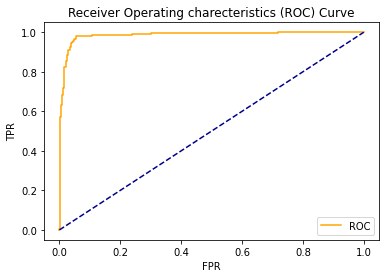

In [27]:
plot_roc_curve(fpr,tpr)